## Data Science Technology and Systems PG

### Assignment 1 - Part B : Predictive Modelling


#### Import required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ast

#### Load and Inspect Data


In [2]:
# load the data
df = pd.read_csv("./data/zomato_df_final_data.csv")

# print the shape of the data
df.shape

(10500, 17)

In [3]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [4]:
# df head
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


#### Data Exploration and feature engineering

In this phase we will do the following:

- remove useless columns
- check and remove duplicate records
- check the missing value count for each columns and handle it


#### Remove columns

As our objective is to predict the restaurant rating, we will remove some of the fields that may not as useful in predicting it. I have identifies the following fields as less useful:

- address (the relevant information can be extracted from subzone)
- cuisines (the cuisines column contains a multiple cuisines, from the data exploration phase we have identified that there isn't any significant influence in rating with the cuisines)
- link
- phone
- rating text (directly related to rating number)
- title
- groupon (variable with negligile variance)
- color
- cuisine_color
- lat
- lng


In [5]:
# select the required columns
df_model = df[
    ["cost", "cost_2", "cuisine", "votes", "type", "subzone", "rating_text", "groupon"]
]

# df head
df_model.head()

,cost,cost_2,cuisine,votes,type,subzone,rating_text,groupon
0,50.0,5.243902,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",1311.0,['Casual Dining'],CBD,Very Good,False
1,80.0,7.560976,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",3236.0,['Café'],"The Grounds of Alexandria, Alexandria",Excellent,False
2,120.0,10.650407,['Japanese'],1227.0,['Fine Dining'],"The Star, Pyrmont",Excellent,False
3,270.0,22.235772,['Modern Australian'],278.0,"['Fine Dining', 'Bar']",Circular Quay,Excellent,False
4,55.0,5.630081,"['Thai', 'Salad']",2150.0,['Casual Dining'],Chinatown,Excellent,False


In [6]:
# shape of the dataframe
df_model.shape

(10500, 8)

In [7]:
# check for na values
df_model.isna().sum()

cost            346
cost_2          346
cuisine           0
votes          3316
type             48
subzone           0
rating_text    3316
groupon           0
dtype: int64

In [8]:
# Convert string representation of lists to actual lists in the "cuisine" column using .loc[]
df_model.loc[:, "cuisine"] = df_model["cuisine"].apply(ast.literal_eval)

# Convert string representation of lists to actual lists in the "type" column, replacing NaN with empty lists, using .loc[]
df_model.loc[:, "type"] = df_model["type"].fillna("[]").apply(ast.literal_eval)

In [9]:
df_model = df_model.copy()

# let's clean the subzones column


# we will extract the last part of the subzone column seperated by commas, if any and remove trailing whitespaces


df_model.loc[:, "suburb"] = df_model["subzone"].str.split(",").str[-1]


# remove trailing whitespaces


df_model.loc[:, "suburb"] = df_model["suburb"].str.strip()


# drop the subzone column


df_model.drop("subzone", axis=1, inplace=True)

In [10]:
# check the number of unique values in the suburb column
df_model["suburb"].nunique()

339

In [11]:
# let's check the count of each unique value in the suburb column
df_model["suburb"].value_counts()

suburb
CBD                                792
Surry Hills                        269
Parramatta                         264
Chinatown                          228
Darlinghurst                       193
                                  ... 
Coogee Legion Club                   1
Royal Exhibition Hotel               1
Jenolan                              1
Sofitel Sydney Darling Harbour       1
Glenrose Villge Shopping Centre      1
Name: count, Length: 339, dtype: int64

### Handling missing values in Target variable and `type` variable


In [12]:
# count na values for each column
df_model.isna().sum()

cost            346
cost_2          346
cuisine           0
votes          3316
type              0
rating_text    3316
groupon           0
suburb            0
dtype: int64

In [13]:
# remove columns where rating number is not available
df_model = df_model.dropna(subset=["rating_text"])
df_model = df_model.dropna(subset=["type"])

In [14]:
# shape of column
df_model.shape

(7184, 8)

In [15]:
df_model.isna().sum()

cost           103
cost_2         103
cuisine          0
votes            0
type             0
rating_text      0
groupon          0
suburb           0
dtype: int64

In [16]:
# no. of unique values for rating number
df_model["rating_text"].nunique()

# value counts for rating number
df_model["rating_text"].value_counts()

rating_text
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: count, dtype: int64

In [17]:
# let's simplify the rating_text column into binary classes
# we will encode 'Good', 'Very Good', 'Excellent' as 1 and 'Average', 'Poor' as 0
df_model["rating_text"] = df_model["rating_text"].apply(
    lambda x: 1 if x in ["Good", "Very Good", "Excellent"] else 0
)

In [18]:
# label encode the groupon column using sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model["groupon"] = le.fit_transform(df_model["groupon"])

# check the unique values in the groupon column
df_model["groupon"].value_counts()

groupon
0    7083
1     101
Name: count, dtype: int64

In [19]:
# view the head of the dataframe
df_model.head()

,cost,cost_2,cuisine,votes,type,rating_text,groupon,suburb
0,50.0,5.243902,"[Hot Pot, Korean BBQ, BBQ, Korean]",1311.0,[Casual Dining],1,0,CBD
1,80.0,7.560976,"[Cafe, Coffee and Tea, Salad, Poké]",3236.0,[Café],1,0,Alexandria
2,120.0,10.650407,[Japanese],1227.0,[Fine Dining],1,0,Pyrmont
3,270.0,22.235772,[Modern Australian],278.0,"[Fine Dining, Bar]",1,0,Circular Quay
4,55.0,5.630081,"[Thai, Salad]",2150.0,[Casual Dining],1,0,Chinatown


#### Numerical and Categorical Variables


In [20]:
num_features = ["cost", "votes", "cost_2"]
cat_features = ["cuisine", "type", "subzone", "groupon"]

### Splitting the data into test and train


In [21]:
X = df_model.drop("rating_text", axis=1)
y = df_model["rating_text"]

# shape of X and y
X.shape, y.shape

((7184, 7), (7184,))

In [22]:
# split data into train and test
# 80% train and 20% test
# random state is set to 0
# so that we get the same split every time
# this is important for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Handling missing numerical variables


Imputing missing values in cost and cost_2 columns using median values.


In [23]:
# handling missing values in cost and cost_2
# fill missing values with the median of the column
cost_median = X_train["cost"].median()
cost_2_median = X_train["cost_2"].median()

X_train["cost"] = X_train["cost"].fillna(cost_median)
X_train["cost_2"] = X_train["cost_2"].fillna(cost_2_median)

X_test["cost"] = X_test["cost"].fillna(cost_median)
X_test["cost_2"] = X_test["cost_2"].fillna(cost_2_median)

# check for missing values
X_train.isna().sum()

cost       0
cost_2     0
cuisine    0
votes      0
type       0
groupon    0
suburb     0
dtype: int64

In [24]:
# check for missing values
X_test.isna().sum()

cost       0
cost_2     0
cuisine    0
votes      0
type       0
groupon    0
suburb     0
dtype: int64

### Feature Engineering

`cuisine` : It is list of all cusines served by the restaurant. There are almost 134 unique cuisines. Out of 134 unique cusines in the dataset, we will take the cuisines that are served in less than 100 restaurants as other cuisines.


In [25]:
# list to store all the cusines to obtain unique cuisines
cuisine_list = []
for cuisine in X_train["cuisine"]:
    cuisine_list.extend(cuisine)

# convert the list to a pandas series
cuisine_series = pd.Series(cuisine_list)

# get unique cuisines
cuisine_list = cuisine_series.unique()

# cuisines that are served in less than 100 restaurants
# will be considered as other
cuisine_counts = cuisine_series.value_counts()

# get the cuisines that are served in more than 100 restaurants
top_cuisines = cuisine_counts[cuisine_counts >= 100].index

# get the cuisines that are served in less than 100 restaurants
other_cuisines = cuisine_counts[cuisine_counts < 100].index

# create new column called other_cuisines,
# set the value of the column to 1 if any of the cuisines in the other_cuisines list is present
# in the list in the cuisine column, else set the value to 0
X_train["other_cuisines"] = X_train["cuisine"].apply(
    lambda x: 1 if any(cuisine in other_cuisines for cuisine in x) else 0
)
X_test["other_cuisines"] = X_test["cuisine"].apply(
    lambda x: 1 if any(cuisine in other_cuisines for cuisine in x) else 0
)


# function to add new column for each cuisine
# check each row and if the cuisine is presents in the cuisine list
# then set the value to 1 else 0
def add_cuisine_columns(df, cuisine_list):
    for cuisine in top_cuisines:
        key = cuisine.lower().replace(" ", "_")
        df[key] = df["cuisine"].apply(lambda x: 1 if cuisine in x else 0)
    return df

In [26]:
add_cuisine_columns(X_train, cuisine_list)

X_train.head()

,cost,cost_2,cuisine,votes,type,groupon,suburb,other_cuisines,cafe,modern_australian,...,bar_food,sandwich,vegetarian,australian,healthy_food,desserts,korean,coffee_and_tea,mediterranean,bakery
2653,30.0,3.699187,[Cafe],36.0,[Café],0,Willoughby,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2707,50.0,5.243902,[Thai],54.0,[Casual Dining],0,Balmain,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3190,40.0,4.471545,"[Vietnamese, Pho]",56.0,[Casual Dining],0,Hornsby,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3763,70.0,6.788618,[Indian],22.0,[Casual Dining],0,Cremorne,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2715,40.0,4.471545,"[Poké, Hawaiian, Japanese]",16.0,[],0,North Sydney,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
add_cuisine_columns(X_test, cuisine_list)
X_test.head()

,cost,cost_2,cuisine,votes,type,groupon,suburb,other_cuisines,cafe,modern_australian,...,bar_food,sandwich,vegetarian,australian,healthy_food,desserts,korean,coffee_and_tea,mediterranean,bakery
1667,95.0,8.719512,"[Italian, Pizza]",92.0,[Casual Dining],0,Willoughby,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1835,30.0,3.699187,"[Bakery, Cafe]",152.0,"[Bakery, Café]",0,Redfern,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4511,20.0,2.926829,[Mexican],9.0,[Fast Food],0,Macquarie Park,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6088,40.0,4.471545,[Cafe],5.0,[Café],0,Engadine,0,1,0,...,0,0,0,0,0,0,0,0,0,0
913,75.0,7.174797,"[Seafood, Australian]",36.0,[Casual Dining],0,Paddington,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
X_train = X_train.drop("cuisine", axis=1)
X_test = X_test.drop("cuisine", axis=1)

`type`: The type column has 15 unique values. we will do one hot encoding for this column as well.


In [29]:
# let's aggregate the type column, i.e merge all lists in type column into one list
type_list = []
for type in X_train["type"]:
    type_list.extend(type)

# convert the list to a pandas series
type_series = pd.Series(type_list)

# view the data
# type_series.head()

# get unique types
type_list = type_series.unique()

# type counts
type_counts = type_series.value_counts()


# get the types that are highest in number
top_types = type_counts[type_counts >= 100].index

# get the types that are lowest in number
other_types = type_counts[type_counts < 100].index

# create new column called other_types,
# set the value of the column to 1 if any of the types in the other_types list is present
# in the list in the type column, else set the value to 0
X_train["other_types"] = X_train["type"].apply(
    lambda x: 1 if any(type in other_types for type in x) else 0
)
X_test["other_types"] = X_test["type"].apply(
    lambda x: 1 if any(type in other_types for type in x) else 0
)


# function to add new column for each type
# check each row and if the type is presents in the type list
# then set the value to 1 else 0
def add_type_columns(df):
    for type in top_types:
        key = type.lower().replace(" ", "_")
        df[key] = df["type"].apply(lambda x: 1 if type in x else 0)
    return df

In [30]:
add_type_columns(X_train)

X_train.head()

,cost,cost_2,votes,type,groupon,suburb,other_cuisines,cafe,modern_australian,italian,...,coffee_and_tea,mediterranean,bakery,other_types,casual_dining,café,bar,fast_food,pub,food_court
2653,30.0,3.699187,36.0,[Café],0,Willoughby,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2707,50.0,5.243902,54.0,[Casual Dining],0,Balmain,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3190,40.0,4.471545,56.0,[Casual Dining],0,Hornsby,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3763,70.0,6.788618,22.0,[Casual Dining],0,Cremorne,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2715,40.0,4.471545,16.0,[],0,North Sydney,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
add_type_columns(X_test)
X_test.head()

,cost,cost_2,votes,type,groupon,suburb,other_cuisines,cafe,modern_australian,italian,...,coffee_and_tea,mediterranean,bakery,other_types,casual_dining,café,bar,fast_food,pub,food_court
1667,95.0,8.719512,92.0,[Casual Dining],0,Willoughby,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1835,30.0,3.699187,152.0,"[Bakery, Café]",0,Redfern,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
4511,20.0,2.926829,9.0,[Fast Food],0,Macquarie Park,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6088,40.0,4.471545,5.0,[Café],0,Engadine,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
913,75.0,7.174797,36.0,[Casual Dining],0,Paddington,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
# drop the type column
X_train = X_train.drop("type", axis=1)
X_test = X_test.drop("type", axis=1)

`suburbs`: The subzones needs to be analysed and the suburbs that explains the least variance will be categorised into `other_suburbs`. Subzones that appear less than 5 times will be categorised into `other_suburbs`


In [33]:
# check the unique values in the suburb column
X_train["suburb"].nunique()

# check the count of each unique value in the suburb column
X_train["suburb"].value_counts()

# check the number of suburbs that appear less than 2 times
# these suburbs will be considered as other suburbs
suburb_counts = X_train["suburb"].value_counts()
other_suburbs = suburb_counts[suburb_counts < 2].index

# check the number of suburbs that appear more than 2 times
top_suburbs = suburb_counts[suburb_counts >= 2].index

# create new column called other_suburbs
# set the value of the column to 1 if the suburb is in the other_suburbs list, else set the value to 0
X_train["other_suburbs"] = X_train["suburb"].apply(
    lambda x: 1 if x in other_suburbs else 0
)
X_test["other_suburbs"] = X_test["suburb"].apply(
    lambda x: 1 if x in other_suburbs else 0
)

# Create dictionaries to store new columns for X_train and X_test
train_new_columns = {}
test_new_columns = {}

# Loop through the top suburbs and create the new columns for both X_train and X_test
for suburb in top_suburbs:
    key = suburb.lower().replace(" ", "_")

    # Store the new columns in the dictionary for X_train
    train_new_columns[key] = X_train["suburb"].apply(lambda x: 1 if x == suburb else 0)

    # Store the new columns in the dictionary for X_test
    test_new_columns[key] = X_test["suburb"].apply(lambda x: 1 if x == suburb else 0)

# Convert dictionaries to DataFrames
train_new_columns_df = pd.DataFrame(train_new_columns)
test_new_columns_df = pd.DataFrame(test_new_columns)

# Concatenate the new columns with the original X_train and X_test
X_train = pd.concat([X_train, train_new_columns_df], axis=1)
X_test = pd.concat([X_test, test_new_columns_df], axis=1)

# Drop the original 'suburb' column
X_train = X_train.drop("suburb", axis=1)
X_test = X_test.drop("suburb", axis=1)

# Check the shape of the data
X_train.shape, X_test.shape

((5747, 297), (1437, 297))

In [34]:
# x_train head
X_train.shape, X_test.shape

((5747, 297), (1437, 297))

### Standardising the data

we will use min-max scaler to standardise the values.


In [35]:
# standardize the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,cost,cost_2,votes,groupon,other_cuisines,cafe,modern_australian,italian,chinese,thai,...,workers_blacktown,cherrybrook,narellan,ramsgate,novotel_sydney_olympic_park,kurnell,the_greengate_hotel,eastgardens,seven_hills,holroyd
0,-0.877333,-0.877333,-0.283281,-0.121054,-0.625181,1.600225,-0.354003,-0.322693,-0.300853,-0.289002,...,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658
1,-0.177347,-0.177347,-0.172497,-0.121054,-0.625181,-0.624912,-0.354003,-0.322693,-0.300853,3.460190,...,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658
2,-0.527340,-0.527340,-0.160187,-0.121054,1.599536,-0.624912,-0.354003,-0.322693,-0.300853,-0.289002,...,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658
3,0.522638,0.522638,-0.369447,-0.121054,-0.625181,-0.624912,-0.354003,-0.322693,-0.300853,-0.289002,...,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658
4,-0.527340,-0.527340,-0.406375,-0.121054,1.599536,-0.624912,-0.354003,-0.322693,-0.300853,-0.289002,...,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658,-0.018658


### Dimensionality Reduction

We will use PCA to reduce the dimensionality of the data


In [36]:
# use pca to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
0,-2.992876,0.510509,-0.067965,0.336641,-0.820323,-0.284118,-0.321656,0.386445,0.024515,-0.504903,...,-0.258243,-0.334468,0.035580,0.332797,0.113635,0.376567,0.118173,0.197681,-0.298826,-0.089089
1,0.761593,-1.120758,0.599418,0.722577,-0.619944,0.607022,-0.924257,1.544406,0.801733,-0.361717,...,0.098853,0.592873,-0.049724,-0.545954,-0.253478,0.373787,0.142190,0.260665,0.528015,-0.021001
2,0.535245,-1.924072,0.116423,0.281135,1.115792,-0.295368,-0.812539,0.135098,0.641862,0.017086,...,-0.710285,0.451968,0.953269,0.208664,0.813498,1.633180,-1.268670,-0.080020,-1.120728,-2.238248
3,1.413012,-0.849624,-0.455576,0.652920,-0.320538,-0.554947,-0.435810,0.652542,3.925460,-0.305192,...,0.001970,-0.873788,-0.105109,-0.342437,0.495007,-0.109288,0.047828,-1.298198,-0.330795,-0.045972
4,-0.377401,-1.337217,0.267395,-1.933884,-1.045913,0.157022,1.000268,-0.293063,-0.099991,0.158141,...,0.277400,0.231376,0.005306,0.099599,0.053446,-0.203851,0.062034,0.117246,1.406460,-0.038175


### Modelling the data

We will use linear regression to predict the rating number


Train accuracy:  0.8569688533147729
Test accuracy:  0.8295059151009047


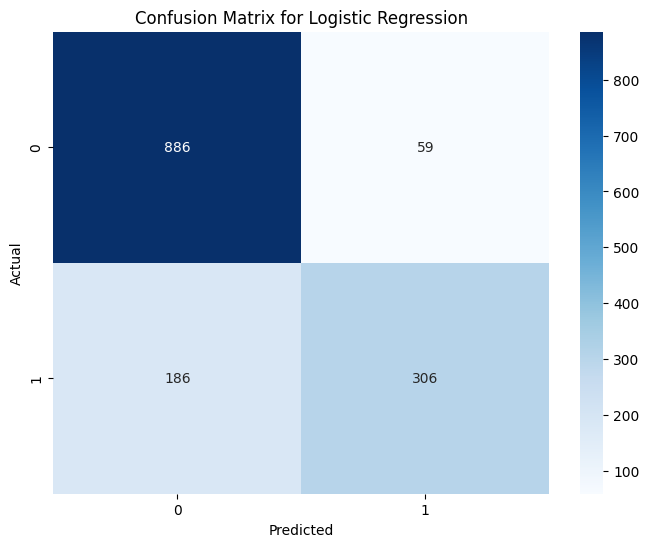

In [37]:
from sklearn.linear_model import LogisticRegression

# modelling
# classifier model
model_classification_3 = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)

# predict the rating
y_train_pred = model_classification_3.predict(X_train_pca)
y_test_pred = model_classification_3.predict(X_test_pca)

# calculate the accuracy of the model
train_accuracy = model_classification_3.score(X_train_pca, y_train)
test_accuracy = model_classification_3.score(X_test_pca, y_test)

print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

# plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

# plot the confusion matrix with value 0 corresponds to "class 1" and 1 corresponds to "class 2"
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [45]:
y_train.head()

2653    0
2707    1
3190    0
3763    0
2715    0
Name: rating_text, dtype: int64

In [38]:
# calculate the precision, recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.8383561643835616
Recall:  0.6219512195121951
F1 Score:  0.7141190198366395


In [39]:
# using svm classifier model
from sklearn.svm import SVC

model_classification_4 = SVC(kernel="linear").fit(X_train_pca, y_train)

# predict the rating
y_train_pred_4 = model_classification_4.predict(X_train_pca)

y_test_pred_4 = model_classification_4.predict(X_test_pca)

# calculate the accuracy of the model
train_accuracy_4 = model_classification_4.score(X_train_pca, y_train)
test_accuracy_4 = model_classification_4.score(X_test_pca, y_test)

print("Train accuracy model_classification_4: ", train_accuracy)
print("Test accuracy model_classification_4: ", test_accuracy)

Train accuracy model_classification_4:  0.8569688533147729
Test accuracy model_classification_4:  0.8295059151009047


#


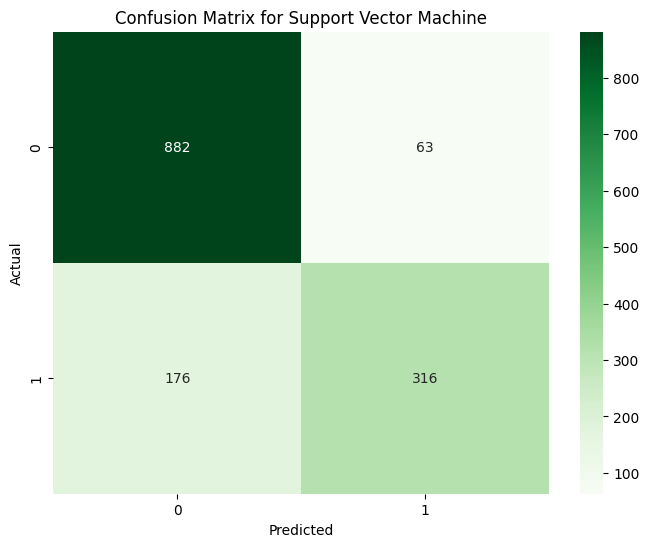

In [40]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5747 entries, 2653 to 2738
Columns: 297 entries, cost to holroyd
dtypes: float64(3), int64(294)
memory usage: 13.1 MB


Train accuracy model_classification_5:  1.0
Test accuracy model_classification_5:  0.8573416840640222


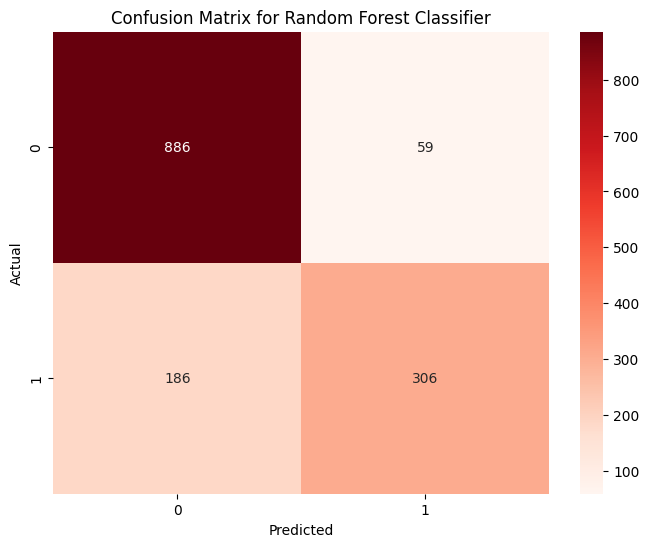

In [42]:
# using random forest classifier model
from sklearn.ensemble import RandomForestClassifier

model_classification_5 = RandomForestClassifier().fit(X_train, y_train)

# predict the rating
y_train_pred_5 = model_classification_5.predict(X_train)
y_test_pred_5 = model_classification_5.predict(X_test)

# calculate the accuracy of the model
train_accuracy_5 = model_classification_5.score(X_train, y_train)
test_accuracy_5 = model_classification_5.score(X_test, y_test)

# print the accuracy of the model
print("Train accuracy model_classification_5: ", train_accuracy_5)
print("Test accuracy model_classification_5: ", test_accuracy_5)

# plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

### Insights and observations

1. **Logistic Regression**:

   - True Positives[Predicted 1 and Actual 1]: 306
   - True Negatives[Predicted 0 and Actual 0]: 886
   - False Positives[Predicted 1 but Actual 0]: 59
   - False Negatives[Predicted 0 but Actual 1]: 186

- **Insights**: Logistic Regression has more false negatives than false positives, which simply means that it misses a lot of positive class predictions. It correctly predicts the negative class, 0.

2. **Support Vector Machine**:

   - True Positives: 316
   - True Negatives: 882
   - False Positives: 63
   - False Negatives: 176

- **Insights**: It has less false negatives than Logistic Regression; hence, SVM is good in the prediction of a positive class. It has more false positives. On the whole, it balances both classes better than Logistic Regression.

3. **Random Forest Classifier**:
   - True Positives: 306
   - True Negatives: 886
   - False Positives: 59
   - False Negatives: 186

- **Observations:** The model with Random Forest performs similarly to the Logistic Regression model. False negatives and false positives, true positives, and true negatives have exactly the same number. It indicates that both models are behaving similarly in this case, but from all accounts, Random Forest should behave better in the cases of complex data structures.

### Comparative Insights:

• SVM is slightly better in capturing the positive class, having fewer false negatives compared to both Logistic Regression and Random Forest.
• Logistic Regression and Random Forest behave similarly with few or fewer false positives but higher false negatives against SVM.
• The trade-off across all models seems to be between the detection of the positive classes and avoiding false positives.
